In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.cm as cm

In [2]:
df = pd.read_excel('TIC_rxns.xlsx')
df.dropna(inplace=True)
df.reset_index(drop=True, inplace=True)
df.head()

,Model,No_of_reactions,No_of_reactions_in_TICs,Fraction
0,RECON1,3741,958,0.256081
1,Recon3D,10600,2409,0.227264
2,STM_v1_0,2545,52,0.020432
3,e_coli_core,95,2,0.021053
4,iAB_RBC_283,469,9,0.019190


C:\Users\rxpav\AppData\Local\Temp\ipykernel_29628\1312689849.py:24: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(ax.get_yticklabels(),fontweight='bold',fontsize=9)


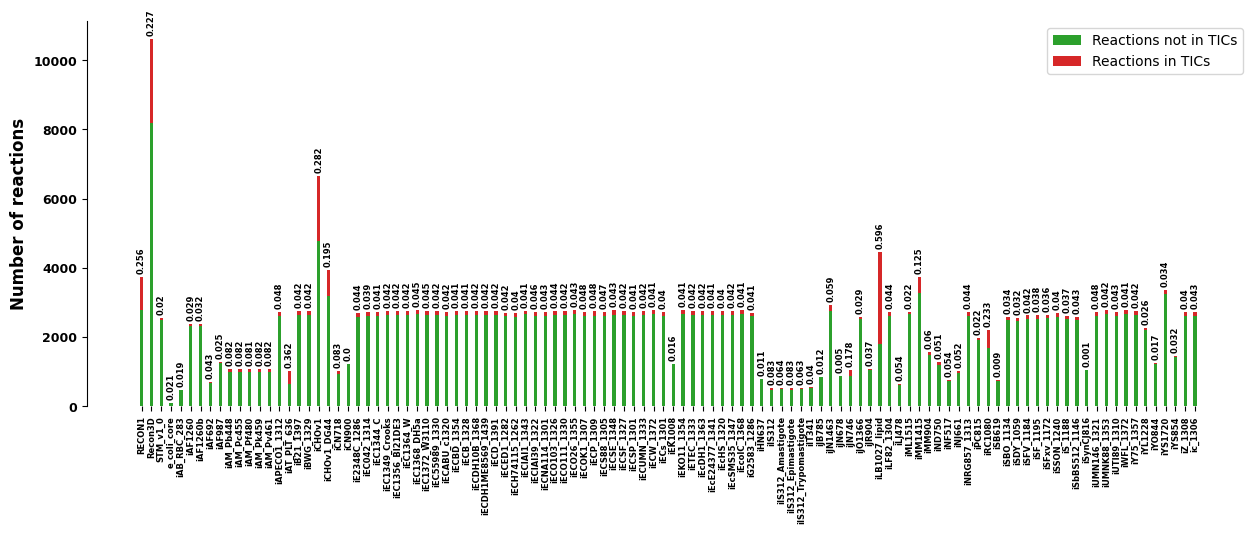

In [5]:
fig,ax =plt.subplots(1,1,figsize=(15,5))
xl=[]
xt=[]
for i in range(len(df['Model'])):
  m = df['Model'][i]
  n1=df['No_of_reactions_in_TICs'][i]
  n2_n1=df['No_of_reactions'][i]-n1
  f=df['Fraction'][i]
  xt.append(i*15)
  xl.append(m)
  k=0
  if i==len(df['Model'])-1:
    ax.bar(i*15,n2_n1,width=5,fc='tab:green',label='Reactions not in TICs')
    ax.bar(i*15,n1,width=5,bottom=n2_n1,fc='tab:red',label='Reactions in TICs')
    ax.text(i*15, n2_n1+n1 +100, str(round(f,3)), ha='center', va='bottom', rotation=90,fontsize=6,fontweight='bold')
  else:
    ax.bar(i*15,n2_n1,width=5,fc='tab:green')
    ax.bar(i*15,n1,width=5,bottom=n2_n1,fc='tab:red')
    ax.text(i*15, n2_n1+n1 +100, str(round(f,3)), ha='center', va='bottom', rotation=90,fontsize=6,fontweight='bold')
ax.set_ylabel("Number of reactions",fontweight='bold',fontsize=12)

ax.set_xticks(xt)
ax.set_xticklabels(xl,fontsize=6,rotation=90,fontweight='bold')
ax.set_yticklabels(ax.get_yticklabels(),fontweight='bold',fontsize=9)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
plt.legend()
plt.savefig('TICrxnsCount.pdf',bbox_inches='tight')